**Cardiovascular diseases dataset.**

**En ésta ocasión tenemos una data frame con 68782 registros de datos de pacientes que se recopilaron en un examen médico, los datos obtenidos servirán para dar un análisis completo acerca de enfermedades cardiovasculares. 
El objetivo de este análisis, de manera general, es saber para qué rango de personas es más preocupante éste tipo de enfermedades. A lo largo del análisis nos daremos cuenta que es lo que más influye para provocar éstas enfermedades.
Finalmente daremos algunas recomendaciones y conclusiones sobre la data frame.**


Nuestra variable objetivo recae en enfermedad cardiaca respecto a varias características en el conjunto de datos para predecir la presencia o ausencia de una enfermedad cardiovascular junto a las variables relacionas a CARDIO_DISEASE (asi ubicaremos nuestra variable objetivo).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/JairAmaro/TemasComputo_BaseBin.git

Cloning into 'TemasComputo_BaseBin'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
#Leemos nuestro archivo excel que se encuentra en github
cardio_data = pd.read_excel("/content/TemasComputo_BaseBin/Cardiovascular diseases dataset (clean).xlsx")

In [ ]:
#Llamamos los primeros 5 renglones de nuestra data
cardio_data.head(5)

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
#Hacemos un conteo de las filas y columnas que contiene nuestra data
cardio_data.shape

(68783, 12)

In [ ]:
#Llamamos a la información de la data, nos dice el nombre de cada columna y el tipo de dato de cada una
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [ ]:
#Hacemos un conteo por genero, 1 son las mi¿ujeres, 2 son los hombres
cardio_data.groupby(['GENDER']).count()

,AGE,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
GENDER,,,,,,,,,,,
1,44795,44795,44795,44795,44795,44795,44795,44795,44795,44795,44795
2,23988,23988,23988,23988,23988,23988,23988,23988,23988,23988,23988


In [ ]:
#conteo por genero cortando las demás columnas
#Tenemos un total de 44795 mujeres y 23987 hombres
cardio_data.groupby(['GENDER'])['AGE'].count()

GENDER
1    44795
2    23988
Name: AGE, dtype: int64

In [ ]:
#Contamos el número de personas por genero y por edad
n_personas=cardio_data.groupby(['GENDER','AGE'])['AGE'].count()
n_personas

GENDER  AGE
1       30        3
        39      236
        40     1708
        41      477
        42     1572
        43      419
        44     1716
        45      461
        46     1749
        47      471
        48     1906
        49      667
        50     3485
        51      903
        52     3478
        53      938
        54     3930
        55      992
        56     4035
        57      957
        58     3634
        59      921
        60     3709
        61      799
        62     2328
        63      633
        64     2463
        65      205
2       30        1
        39      166
        40      966
        41      277
        42     1014
        43      255
        44     1072
        45      285
        46     1161
        47      273
        48     1239
        49      373
        50     1702
        51      422
        52     1716
        53      445
        54     1967
        55      485
        56     1876
        57      465
        58     1952
        

In [ ]:
#Conteo por genero de las personas que fuman(1) y las que no lo hacen(0)
cardio_data.groupby(['GENDER','SMOKE'])['AGE'].count()

GENDER  SMOKE
1       0        43999
        1          796
2       0        18731
        1         5257
Name: AGE, dtype: int64

In [ ]:
#Conteo total de las personas que fuman(1) y las que no lo hacen(0)
cardio_data.groupby(['SMOKE'])['AGE'].count()

SMOKE
0    62730
1     6053
Name: AGE, dtype: int64

In [ ]:
#Conteo total de las personas que consumen alcohol(1) y las que no lo hacen(0)
cardio_data.groupby(['ALCOHOL'])['AGE'].count()

ALCOHOL
0    65094
1     3689
Name: AGE, dtype: int64

In [ ]:
#Conteo por genero de las personas que consumen alcohol(1) y las que no lo hacen(0)
cardio_data.groupby(['GENDER','ALCOHOL'])['AGE'].count()

GENDER  ALCOHOL
1       0          43656
        1           1139
2       0          21438
        1           2550
Name: AGE, dtype: int64

In [ ]:
#Conteo por nivel de colesterol, 1 es normal, 2 por encima de lo normal, 3 muy por encima de lo normal
cardio_data.groupby(['CHOLESTEROL'])['AGE'].count()

CHOLESTEROL
1    51582
2     9315
3     7886
Name: AGE, dtype: int64

In [ ]:
#Conteo por genero y nivel de colesterol, 1 es normal, 2 por encima de lo normal, 3 muy por encima de lo normal
cardio_data.groupby(['GENDER','CHOLESTEROL'])['AGE'].count()

GENDER  CHOLESTEROL
1       1              33086
        2               6264
        3               5445
2       1              18496
        2               3051
        3               2441
Name: AGE, dtype: int64

In [ ]:
#Conteo por nivel de glucosa, 1 es normal, 2 por encima de lo normal, 3 muy por encima de lo normal
cardio_data.groupby(['GLUCOSE'])['AGE'].count()

GLUCOSE
1    58474
2     5074
3     5235
Name: AGE, dtype: int64

In [ ]:
#Conteo por genero y nivel de glucosa, 1 es normal, 2 por encima de lo normal, 3 muy por encima de lo normal
cardio_data.groupby(['GENDER','GLUCOSE'])['AGE'].count()

GENDER  GLUCOSE
1       1          37860
        2           3350
        3           3585
2       1          20614
        2           1724
        3           1650
Name: AGE, dtype: int64

In [ ]:
#Condicionamos la variable AP HIGH para que nos muestre valores mayores a 130
condicion1=cardio_data['AP_HIGH']>130
cardio_data[condicion1]

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
1,55,1,156,85,140,90,3,1,0,0,1,1
3,48,2,169,82,150,100,1,1,0,0,1,1
22,63,1,158,90,145,85,2,2,0,0,1,1
24,46,1,170,68,150,90,3,1,0,0,1,1
31,64,1,169,71,140,90,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68775,51,1,161,56,170,90,1,1,0,0,1,1
68777,58,1,165,80,150,80,1,1,0,0,1,1
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1


In [ ]:
#Conteo con nuestra condicón de la variable AP HIGH True son lo que la cumplen y False los que no
cardio_data.groupby([condicion1])['AP_HIGH'].count() 

AP_HIGH
False    49995
True     18788
Name: AP_HIGH, dtype: int64

In [ ]:
#Condicionamos la variable AP LOW para que nos muestre valores mayores a 80
condicion2=cardio_data['AP_LOW']>80
cardio_data[condicion2]

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
1,55,1,156,85,140,90,3,1,0,0,1,1
3,48,2,169,82,150,100,1,1,0,0,1,1
7,62,2,178,95,130,90,3,3,0,0,1,1
14,40,2,181,95,130,90,1,1,1,1,1,0
22,63,1,158,90,145,85,2,2,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68774,56,1,159,72,130,90,2,2,0,0,1,0
68775,51,1,161,56,170,90,1,1,0,0,1,1
68776,54,1,172,70,130,90,1,1,0,0,1,1
68779,62,1,158,126,140,90,2,2,0,0,1,1


In [ ]:
#Conteo con nuestra condicón de la variable AP LOW True son lo que la cumplen y False los que no
cardio_data.groupby([condicion2])['AP_LOW'].count()

AP_LOW
False    48759
True     20024
Name: AP_LOW, dtype: int64

In [ ]:
#Condicionamos la variable AP HIGH para que nos muestre valores mayores a 130 y la variable AP LOW para que nos muestre valores mayores a 80
condicion3=( cardio_data['AP_HIGH']>130) & (cardio_data['AP_LOW']>80) 
cardio_data[condicion3]

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
1,55,1,156,85,140,90,3,1,0,0,1,1
3,48,2,169,82,150,100,1,1,0,0,1,1
22,63,1,158,90,145,85,2,2,0,0,1,1
24,46,1,170,68,150,90,3,1,0,0,1,1
31,64,1,169,71,140,90,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68755,47,1,165,76,140,90,1,1,0,0,1,1
68762,61,1,163,74,160,100,2,2,0,0,1,1
68775,51,1,161,56,170,90,1,1,0,0,1,1
68779,62,1,158,126,140,90,2,2,0,0,1,1


In [ ]:
#Conteo con nuestra condicón de la variable AP HIGH y de AP HIGH True son lo que la cumplen y False los que no
cardio_data.groupby([condicion3])['AP_LOW'].count()

False    54155
True     14628
Name: AP_LOW, dtype: int64

In [ ]:
#Conteo de cuantas personas tienen enfermedad cardiovacular por genero, (1) mujeres, (2) hombres y (0) no tienen enfermedad cardio y (1) si tienen 
cardio_data.groupby(['GENDER','CARDIO_DISEASE'])['AGE'].count()

GENDER  CARDIO_DISEASE
1       0                 22744
        1                 22051
2       0                 11998
        1                 11990
Name: AGE, dtype: int64

In [ ]:
#Condicionamos la variable AP HIGH para que nos muestre valores mayores a 130 y la variable CARDIO_DIASEASE para que nos muestre las personas que SI tienen
condicion4=(cardio_data['AP_HIGH']>130) & (cardio_data['CARDIO_DISEASE']==1)
cardio_data[condicion4]

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
1,55,1,156,85,140,90,3,1,0,0,1,1
3,48,2,169,82,150,100,1,1,0,0,1,1
22,63,1,158,90,145,85,2,2,0,0,1,1
24,46,1,170,68,150,90,3,1,0,0,1,1
31,64,1,169,71,140,90,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68775,51,1,161,56,170,90,1,1,0,0,1,1
68777,58,1,165,80,150,80,1,1,0,0,1,1
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1


In [ ]:
#Condicionamos la variable AP LOW para que nos muestre valores mayores a 80 y la variable CARDIO_DIASEASE para que nos muestre las personas que SI tienen
condicion5=(cardio_data['AP_LOW']>80) & (cardio_data['CARDIO_DISEASE']==1)
cardio_data[condicion5]

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
1,55,1,156,85,140,90,3,1,0,0,1,1
3,48,2,169,82,150,100,1,1,0,0,1,1
7,62,2,178,95,130,90,3,3,0,0,1,1
22,63,1,158,90,145,85,2,2,0,0,1,1
24,46,1,170,68,150,90,3,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
68765,52,1,153,86,130,90,1,2,0,0,1,1
68775,51,1,161,56,170,90,1,1,0,0,1,1
68776,54,1,172,70,130,90,1,1,0,0,1,1
68779,62,1,158,126,140,90,2,2,0,0,1,1


In [ ]:
#Conteo de enfermedad cardiovascular (0) no tienen, (1) si tienen
cardio_data.groupby(['CARDIO_DISEASE'])['AGE'].count()

CARDIO_DISEASE
0    34742
1    34041
Name: AGE, dtype: int64

In [ ]:
#Media aritmetica de la variable CARDIO_DISEASE
cardio_data['CARDIO_DISEASE'].mean()

0.49490426413503336

In [ ]:
#Corroboramos el resultado
34041/68782

0.49491145939344594

In [ ]:
#Se imprime toda la columna llamada cardio disease (enfermedad cardiovascular)
df_scores=cardio_data['CARDIO_DISEASE']
print(df_scores)

0        0
1        1
2        1
3        1
4        0
        ..
68778    0
68779    1
68780    1
68781    1
68782    0
Name: CARDIO_DISEASE, Length: 68783, dtype: int64


In [ ]:
#Se imprime toda la columna llamada cardio disease (enfermedad cardiovascular)
df_cardio=cardio_data['CARDIO_DISEASE']
print(df_scores)

0        0
1        1
2        1
3        1
4        0
        ..
68778    0
68779    1
68780    1
68781    1
68782    0
Name: CARDIO_DISEASE, Length: 68783, dtype: int64


In [ ]:
#Se imprime toda la columna llamada Height (altura)
df_height=cardio_data['HEIGHT']
print(df_height)

0        168
1        156
2        165
3        169
4        156
        ... 
68778    168
68779    158
68780    183
68781    163
68782    170
Name: HEIGHT, Length: 68783, dtype: int64


In [ ]:
#Concatenamos el data frame de altura y cardio
pd.concat([df_height,df_cardio], axis=1)

,HEIGHT,CARDIO_DISEASE
0,168,0
1,156,1
2,165,1
3,169,1
4,156,0
...,...,...
68778,168,0
68779,158,1
68780,183,1
68781,163,1


In [ ]:
#df_cardio=cardio_data['CARDIO_DISEASE']
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()],
                axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'media_pro_cardio']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df = df.sort_values(['prop_n_obs'])
    df = df.reset_index(drop = True)
    return df

In [ ]:
#Se hace un data frame con la variable HEIGHT (altura), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'HEIGHT', df_cardio)
print(df_temp)

     HEIGHT  n_obs  media_pro_cardio  prop_n_obs
0        55      1          1.000000    0.000015
1       207      1          0.000000    0.000015
2       131      1          1.000000    0.000015
3       128      1          0.000000    0.000015
4       122      1          1.000000    0.000015
..      ...    ...               ...         ...
101     164   3345          0.505232    0.048631
102     168   4329          0.491568    0.062937
103     170   4606          0.483500    0.066964
104     160   4943          0.497673    0.071864
105     165   5760          0.471701    0.083742

[106 rows x 4 columns]


In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = -90):
    
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['media_pro_cardio']
    y1= df_WoE['prop_n_obs']
    plt.figure(figsize = (14, 4))
    plt.plot(x, y, marker = 'd', linestyle = 'dashdot', color = 'aquamarine', mec = 'b', ms = 10)
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('media_pro_cardio R')
    plt.title(str('media_pro_cardio by ' + df_WoE.columns[0],))
    plt.xticks(rotation = rotation_of_x_axis_labels)
    plt.grid(color='red', linestyle='dotted',linewidth=1.3)
    plt.bar(x, y1, color = 'darkviolet')
    plt.fill_between(x,y,color='lavender')
    plt.subplots_adjust(wspace = 10)
    plt.style.use('default')


    AGE  n_obs  media_pro_cardio  prop_n_obs
0    30      4          0.000000    0.000058
1    65    344          0.683140    0.005001
2    39    402          0.213930    0.005844
3    43    674          0.378338    0.009799
4    47    744          0.461022    0.010817
5    45    746          0.375335    0.010846
6    41    754          0.266578    0.010962
7    63    997          0.708124    0.014495
8    49   1040          0.440385    0.015120
9    61   1196          0.644649    0.017388
10   51   1325          0.429434    0.019263
11   59   1330          0.562406    0.019336
12   53   1383          0.467101    0.020107
13   57   1422          0.547117    0.020674
14   55   1477          0.540284    0.021473
15   42   2586          0.289250    0.037596
16   40   2674          0.227749    0.038876
17   44   2788          0.352582    0.040533
18   46   2910          0.397251    0.042307
19   48   3145          0.462321    0.045724
20   64   3840          0.714323    0.055828
21   62   

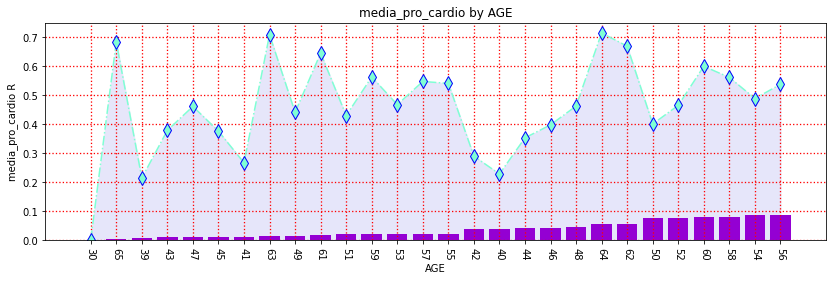

In [ ]:
#Se hace un data frame con la variable AGE (edad), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'AGE', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp)

Esta gráfica presenta la edad respecto a la esperanza de presentar problemas cardiovasculares.
Es con ello que podemos observar que las personas con edad en el intervalo [62,65] su esperanza de presentar problemas cardiovasculares es muy alto, respecto a las personas que se encuentran en el intervalo [39,42] son las que menos presentan estos problemas cardiovasculares. Entonces si suponemos que estamos analizando estos datos para la industria farmaceutica, vamos a indicar que los productos farmaceuticos, anuncios publicitarios, etc., van a ir dirigidos a un sector de la población que este en su caso es la población en vías de retiro. Asimismo si el sector salud Mexicano pide una interpretación de dicha gráfica, podemos decirles que a aquellos pacientes que pertenecen al intervalo de edad [62,65] deberían informarlos para con ello reducir la esperanza y así reducir el gasto público en el sector salud.

   GENDER  n_obs  media_pro_cardio  prop_n_obs
0       2  23988          0.499833    0.348749
1       1  44795          0.492265    0.651251


Text(0.94, 0.61, 'Femenino')

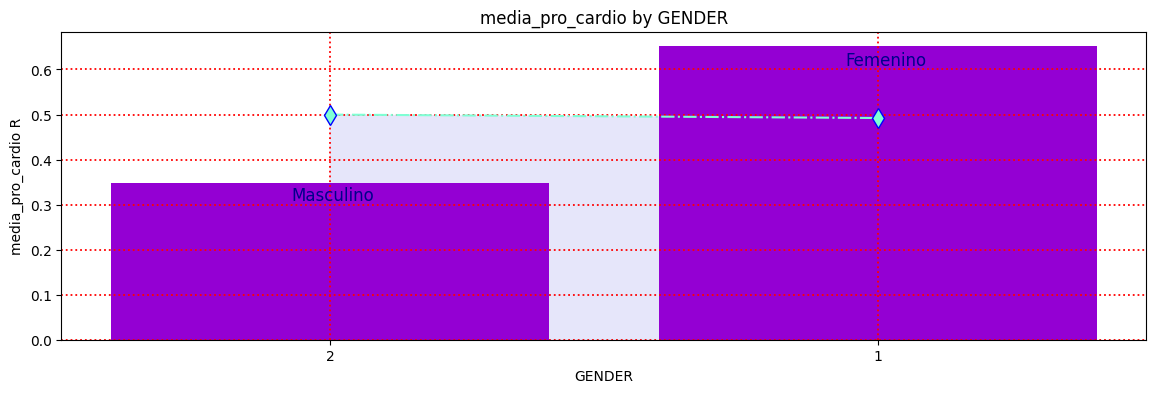

In [ ]:
#Se hace un data frame con la variable GENDER (genero), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'GENDER', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp,rotation_of_x_axis_labels=0)
plt.annotate('Masculino', (0-.07, 0.31),color='darkblue', fontsize=12)
plt.annotate('Femenino', (0.94, 0.61),color='darkblue', fontsize=12)

Esta gráfica representa el género respecto a la esperanza de presentar problemas cardiovasculares; es más general respecto a la anterior, pero podemos notar que la proporción del género másculino es menor que el femenino y aún asi la esperanza es casí igual tanto para el hombre como para la mujer, es decir, los hombres a pesar de que sean menos que las mujeres en proporción respecto al data frame, arrojan la misma esperanza, lo cual es alarmante ya que tienen más esperanza de sufrir algun inconveniente relacionado a problemas cardiovasculares; retomando el caso de la industria fármaceutica, podemos informar al área de marketing que principalmente los anuncios publicitarios vayan enfocados a las hombres, es decir, las paletas de colores para las cajas de medicamentos, los anuncios publicitarios, etc., asimismo para el sector salud es recomendar qué haya más asesorías de información para la hombre que para la mujer. 

     HEIGHT  n_obs  media_pro_cardio  prop_n_obs
0        55      1          1.000000    0.000015
1       207      1          0.000000    0.000015
2       131      1          1.000000    0.000015
3       128      1          0.000000    0.000015
4       122      1          1.000000    0.000015
..      ...    ...               ...         ...
101     164   3345          0.505232    0.048631
102     168   4329          0.491568    0.062937
103     170   4606          0.483500    0.066964
104     160   4943          0.497673    0.071864
105     165   5760          0.471701    0.083742

[106 rows x 4 columns]


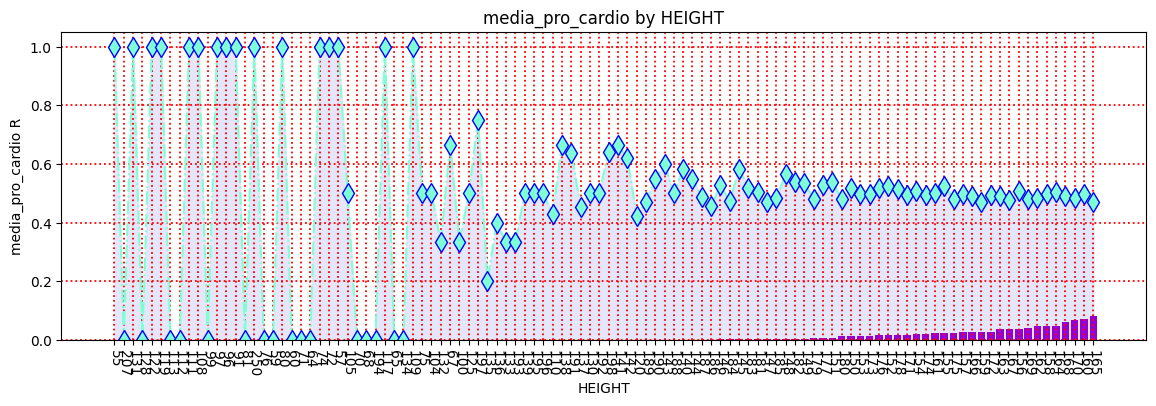

In [ ]:
#Se hace un data frame con la variable HEIGHT (altura), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'HEIGHT', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp)
plt.style.use('default')

Esta gráfica representa la estatura de la población respecto a la esperanza de presentar problemas cardiovasculares. Como podemos notar en nuestro data frame hay personas que están en una proporción menor que son personas que están muy altas o están muy bajas, es decir, dichas personas no son de nuestro interés analizar ya que no es un sector de la población a la cual le podamos dar un analisis profundo.

     WEIGHT  n_obs  media_pro_cardio  prop_n_obs
0        11      1          1.000000    0.000015
1       146      1          1.000000    0.000015
2       147      1          1.000000    0.000015
3       153      1          1.000000    0.000015
4       169      1          0.000000    0.000015
..      ...    ...               ...         ...
147      60   2687          0.426126    0.039065
148      75   2703          0.500555    0.039298
149      68   2798          0.437813    0.040679
150      70   3718          0.466649    0.054054
151      65   3809          0.445524    0.055377

[152 rows x 4 columns]


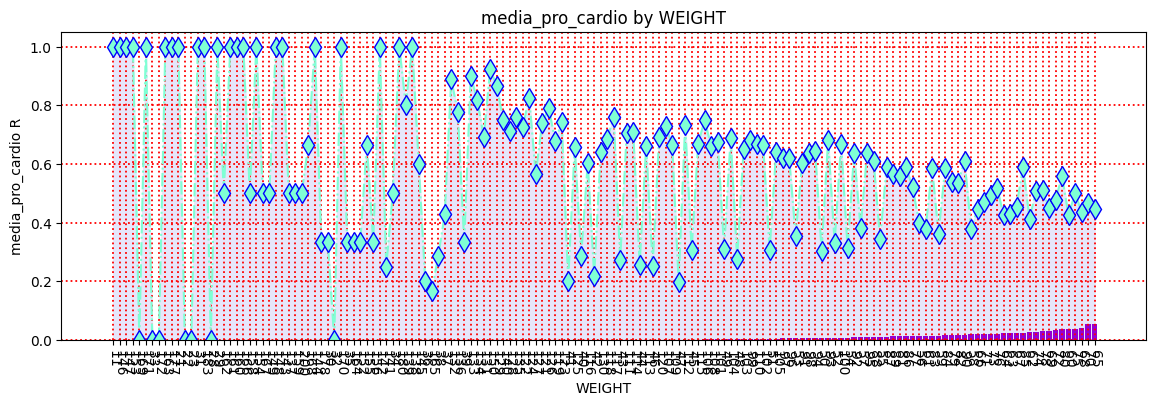

In [ ]:
#Se hace un data frame con la variable WEIGHT (peso), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'WEIGHT', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp)

Esta gráfica representa el peso  de la población respecto a la esperanza de presentar problemas cardiovasculares. Como podemos notar en nuestro data frame hay personas que están en una proporción menor que son personas que están muy delgadas o tienen obesidad, es decir, para realizar un análisis profundo tenemos que acotar solo a las personas que sufren de sobrepeso u obesidad y ver como se correlacionan respecto a la esperanza de sufrir o presentar problemas cardiovasculares. Sabemos que México es el primer país a nivel mundial en que su población tanto adulta como infantil padece de obesidad según la OMS (2018), entonces como cíentifico de datos podemos informar al sector salud la gravedad de la situación y que estos inviertan en anuncios publicitarios respecto a la buena alimentación, el consumo de agua natural, y compartir las consecuencias respecto a la mala alimentación.

     AP_HIGH  n_obs  media_pro_cardio  prop_n_obs
0         60      1          0.000000    0.000015
1        230      1          1.000000    0.000015
2        187      1          1.000000    0.000015
3         93      1          0.000000    0.000015
4         97      1          1.000000    0.000015
..       ...    ...               ...         ...
103      150   4206          0.861864    0.061149
104      110   8633          0.251593    0.125511
105      130   8915          0.596523    0.129611
106      140   9329          0.816379    0.135629
107      120  27663          0.355782    0.402178

[108 rows x 4 columns]


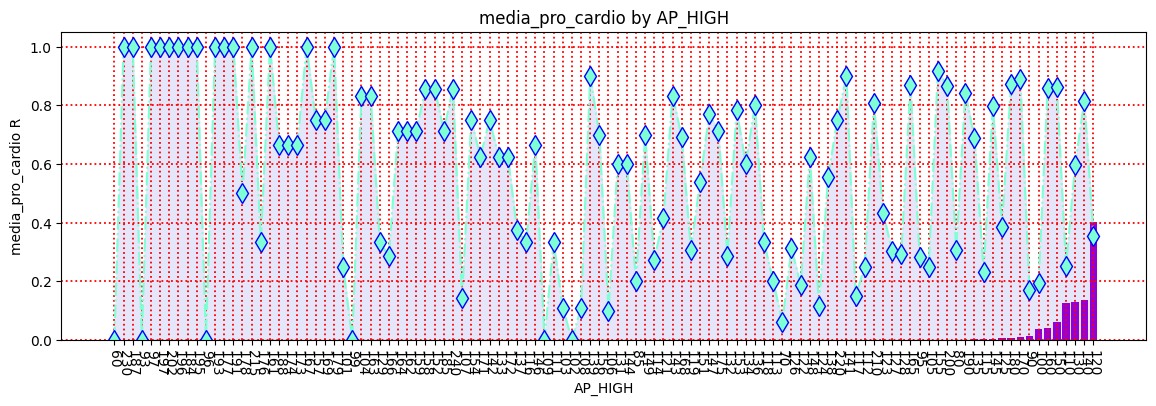

In [ ]:
#Se hace un data frame con la variable AP_HIGH (presión arterial alta), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'AP_HIGH', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp)

    AP_LOW  n_obs  media_pro_cardio  prop_n_obs
0      182      1          1.000000    0.000015
1      107      1          0.000000    0.000015
2      111      1          1.000000    0.000015
3      114      1          0.000000    0.000015
4       54      1          0.000000    0.000015
..     ...    ...               ...         ...
79      60   2716          0.240795    0.039487
80     100   4077          0.838362    0.059273
81      70  10221          0.287252    0.148598
82      90  14270          0.749895    0.207464
83      80  34740          0.424842    0.505067

[84 rows x 4 columns]


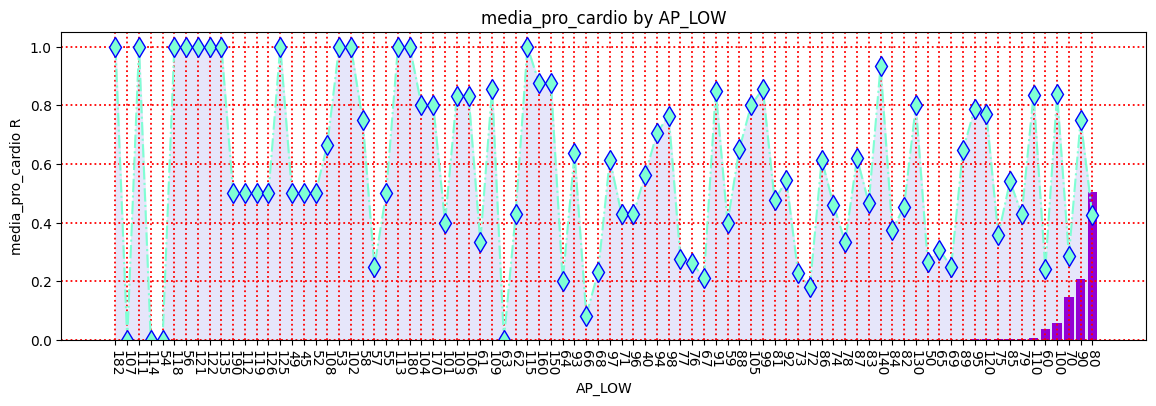

In [ ]:
#Se hace un data frame con la variable AP_LOW (presión arterial bajo), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'AP_LOW', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


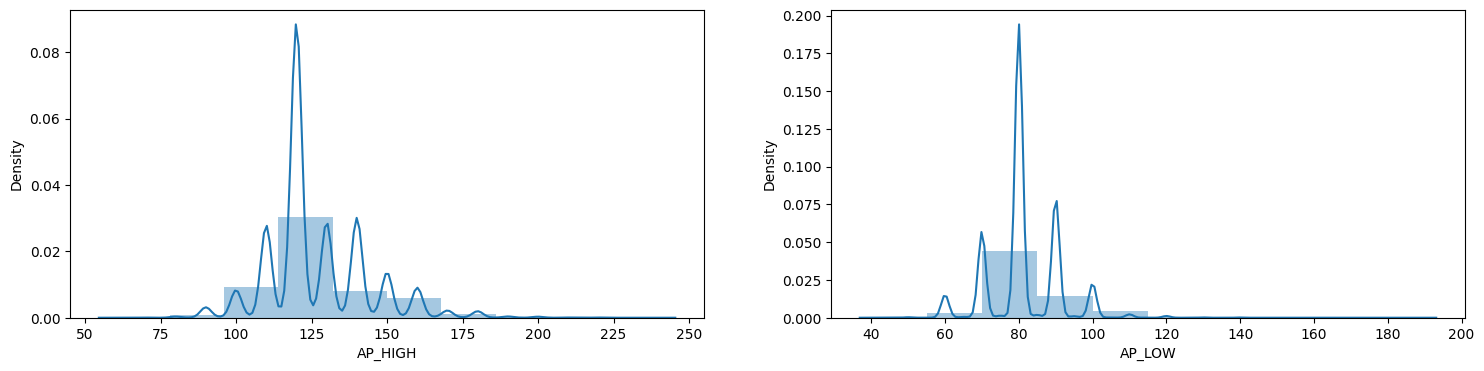

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18,4))

sns.distplot(cardio_data.AP_HIGH, bins=10, kde=True, ax=axes[0])
sns.distplot(cardio_data.AP_LOW, bins=10, kde=True, ax=axes[1])

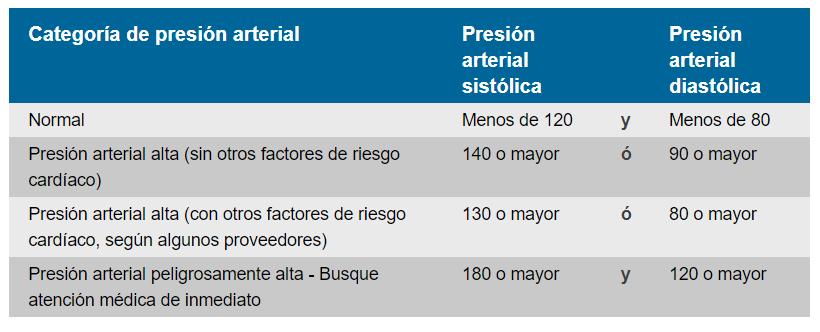

Investigando más a fondo observamos que la presión arterial sistólica se considera normal si es menor a 80, de nuestras muestra observadas vemos que la mayoría de la población se concentra en ese rango, o un poco más arriba.
De igual manera la presión arterial diastólica se considera normal si es menor a 120, pero nuevamente observamos que la mayoría de la población se concentra en el rango de 125, un poco más.


   CHOLESTEROL  n_obs  media_pro_cardio  prop_n_obs
0            3   7886          0.762871    0.114650
1            2   9315          0.596457    0.135426
2            1  51582          0.435598    0.749924


Text(1.91, 0.71, 'Normal')

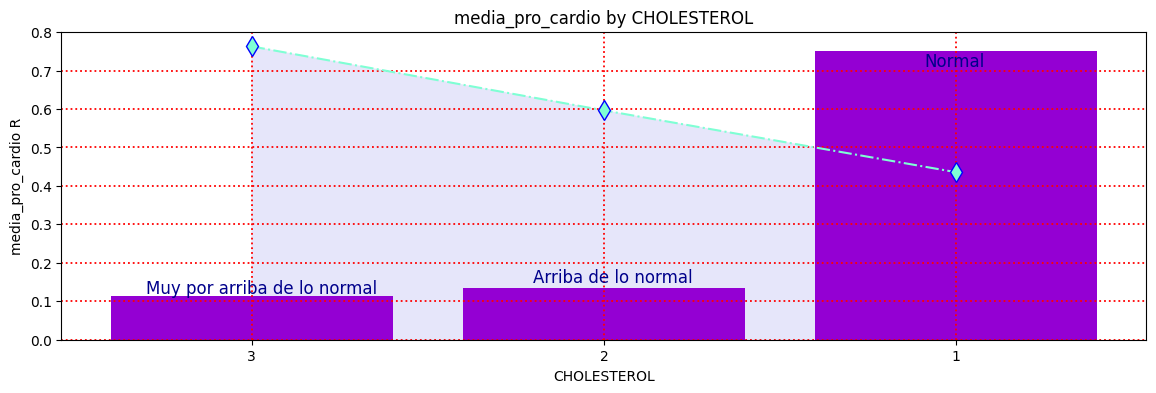

In [ ]:
#Se hace un data frame con la variable CHOLESTEROL (colesterol), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'CHOLESTEROL', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp, rotation_of_x_axis_labels=0)
plt.annotate('Muy por arriba de lo normal', (0-.3, 0.12),color='darkblue', fontsize=12)
plt.annotate('Arriba de lo normal', (0.8, 0.15),color='darkblue', fontsize=12)
plt.annotate('Normal', (1.91, 0.71),color='darkblue', fontsize=12)

   GLUCOSE  n_obs  media_pro_cardio  prop_n_obs
0        2   5074          0.588687    0.073768
1        3   5235          0.618720    0.076109
2        1  58474          0.475681    0.850123


Text(1.91, 0.81, 'Normal')

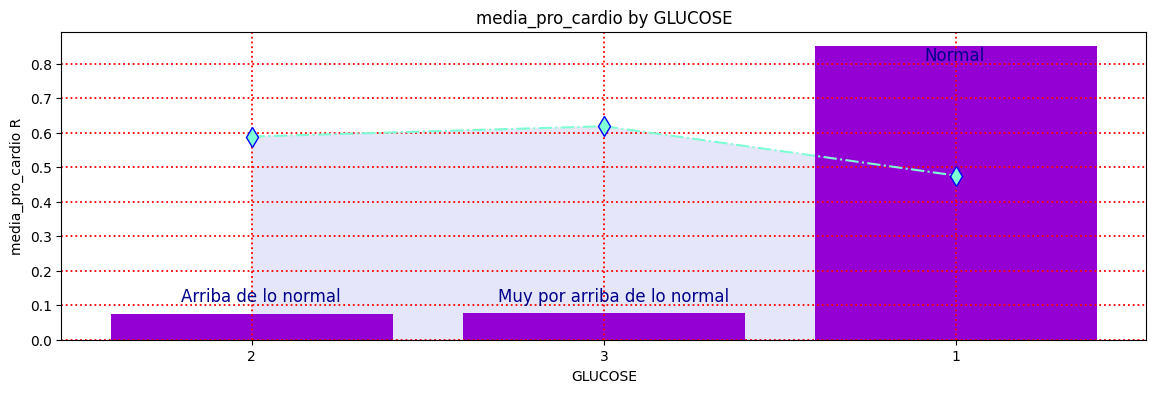

In [ ]:
#Se hace un data frame con la variable GLUCOSE (glucosa), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'GLUCOSE', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp, rotation_of_x_axis_labels=0)
plt.annotate('Arriba de lo normal', (0-.2, 0.11),color='darkblue', fontsize=12)
plt.annotate('Muy por arriba de lo normal', (0.7, 0.11),color='darkblue', fontsize=12)
plt.annotate('Normal', (1.91, 0.81),color='darkblue', fontsize=12)

   SMOKE  n_obs  media_pro_cardio  prop_n_obs
0      1   6053          0.468693    0.088001
1      0  62730          0.497433    0.911999


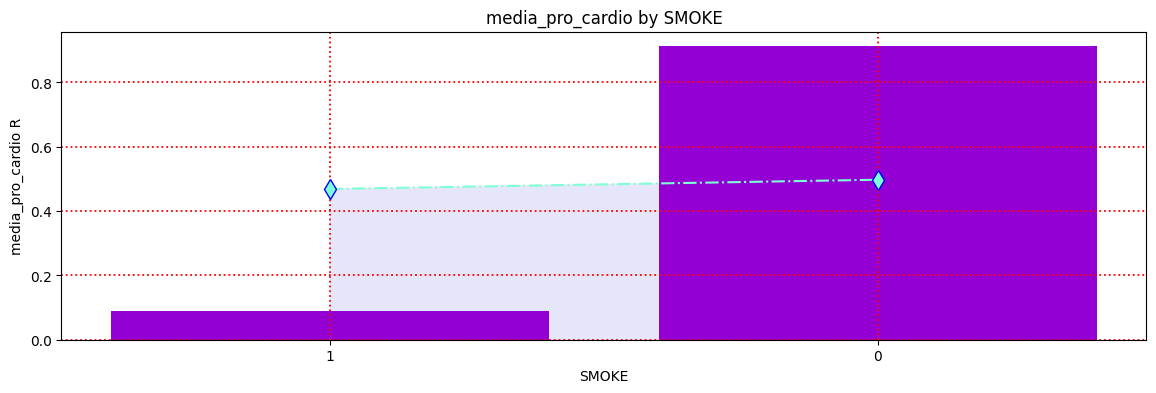

In [ ]:
#Se hace un data frame con la variable SMOKE (fuma o no), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'SMOKE', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp, rotation_of_x_axis_labels=0)

   ALCOHOL  n_obs  media_pro_cardio  prop_n_obs
0        1   3689          0.477636    0.053632
1        0  65094          0.495883    0.946368


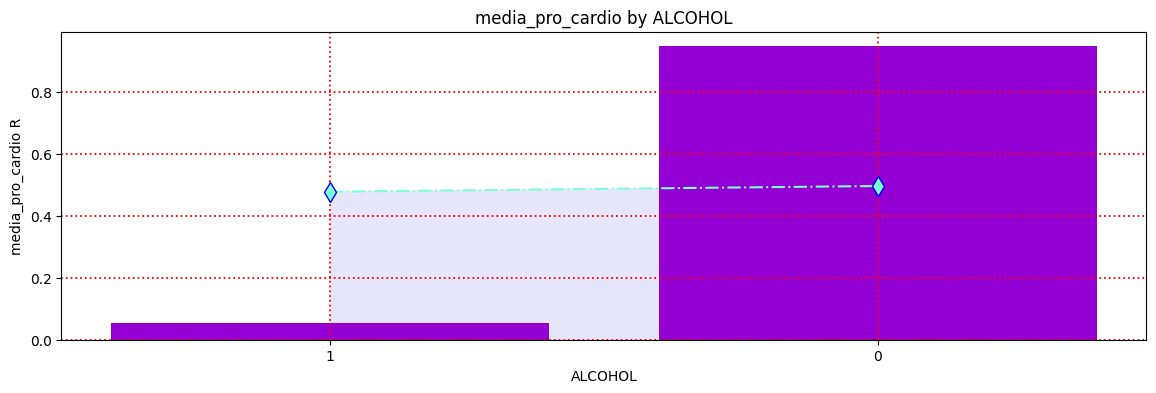

In [ ]:
#Se hace un data frame con la variable ALCOHOL (toma o no alcohol), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'ALCOHOL', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp, rotation_of_x_axis_labels=0)

   PHYSICAL_ACTIVITY  n_obs  media_pro_cardio  prop_n_obs
0                  0  13525          0.532495    0.196633
1                  1  55258          0.485703    0.803367


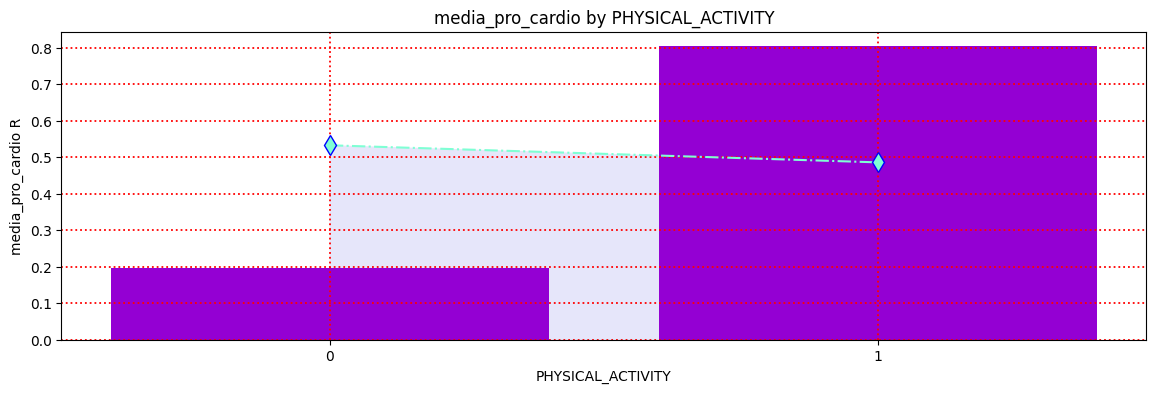

In [ ]:
#Se hace un data frame con la variable PHYSICAL_ACTIVITY (hace o no actividad fisica), las personas observadas y la media de las observadas
df_temp = woe_discrete(cardio_data, 'PHYSICAL_ACTIVITY', df_cardio)
print(df_temp)
#Se hace la gráfica del dataframe
plot_by_woe(df_temp, rotation_of_x_axis_labels=0)

In [ ]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'media_pro_cardio R']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    return df

Text(0.5, 1.0, 'Mapa de calor para nuestro dataframe')

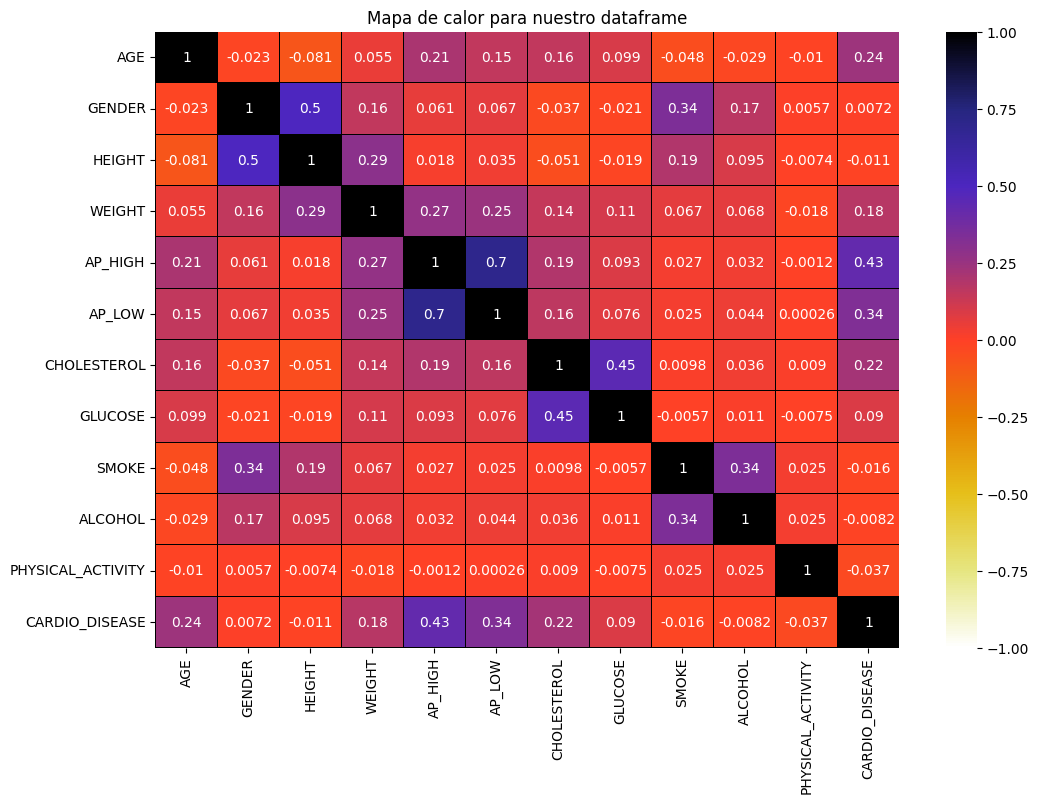

In [ ]:
#cardio_data

correlacion = cardio_data.corr()

plt.figure(figsize=(12, 8))
grafica_calor = sns.heatmap(correlacion,
                            annot = True,
                            linewidths = 0.01,
                            linecolor = 'black',
                            vmin = -1,  
                            cmap = 'CMRmap_r'
                            )
plt.title('Mapa de calor para nuestro dataframe')

# annot siendo verdadero pondra el valor dentro de cada cuadro
# linewidth es poner un color de line con su tamaño, cmap es el color en combinaciones
#vmin valor con menor correlacion

La idea al realizar este mapa de calor es poder ver con mayor detalle las relaciones que hay en cada variable (respecto a nuestra variable objetivo) si son similares entre si, en este caso notamos que AP_HIGH, AP_LOW y EDAD son las que tiene un mayor correlación con nuestra variable objetivó, entonces analizamos la variable AP_HIGH ya que es la que tiene mayor magnitud.

**CONCLUSIONES Y RECOMENDACIONES**

Finalmente, suponiendo que éste análisis es para una farmacéutica o alguna clínica especializada en estás enfermedades, es factible recomendar algún medicamento o tratamiento a personas de la edad adulta, enfocarse en desarrollar soluciones para ellas pues son las más vulnerables a sufrir enfermedades cardiacas.
Por otra parte, es recomendable que la población joven empiece a hacer conciencia de los problemas de la presión alta y así mismo promover el chequeo con frecuencia de su presión arterial para no tener algún tipo de problema en el futuro y poder prevenirlo. Además de cambiar sus ámbitos como es hacer ejercicio regularmente, llevar una dieta saludable, limitar el consumo de alcohol, entre otras cosas.